
#!pip install pystan
#!python -m pip install prophet
#!pip install yfinance

In [3]:

import pandas as pd
from prophet import Prophet
import yfinance as yf

# Define the ticker symbols for the car manufacturing companies
#tickers = ['TM', 'VOW3.DE', 'GM', 'F', 'HMC', 'BMW.DE',  'TSLA', 'NSANY', 'HYMTF', 'INTC', 'NVDA', 'AMD', 'QCOM', 'MU', 'TXN', 'AVGO', 'AMAT', 'ADI', 'AMD']
tickers = ['TEL']

# Create an empty DataFrame to store closing prices
closing_prices = pd.DataFrame()

# Download historical data for each company
for ticker in tickers:
    data = yf.download(ticker, start='2000-01-01', end='2023-01-01')
    closing_prices[ticker] = data['Close']

# Drop any missing values
#closing_prices.dropna(inplace=True)

# Display the closing prices DataFrame
print(closing_prices)



[*********************100%%**********************]  1 of 1 completed

                   TEL
Date                  
2007-06-14   38.849998
2007-06-15   38.799999
2007-06-18   37.150002
2007-06-19   36.700001
2007-06-20   35.950001
...                ...
2022-12-23  113.949997
2022-12-27  113.860001
2022-12-28  112.230003
2022-12-29  115.639999
2022-12-30  114.800003

[3916 rows x 1 columns]


In [5]:
closing_prices

,ds,y
0,2007-06-14,38.849998
1,2007-06-15,38.799999
2,2007-06-18,37.150002
3,2007-06-19,36.700001
4,2007-06-20,35.950001
...,...,...
3911,2022-12-23,113.949997
3912,2022-12-27,113.860001
3913,2022-12-28,112.230003
3914,2022-12-29,115.639999


06:44:27 - cmdstanpy - INFO - Chain [1] start processing
06:44:28 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return

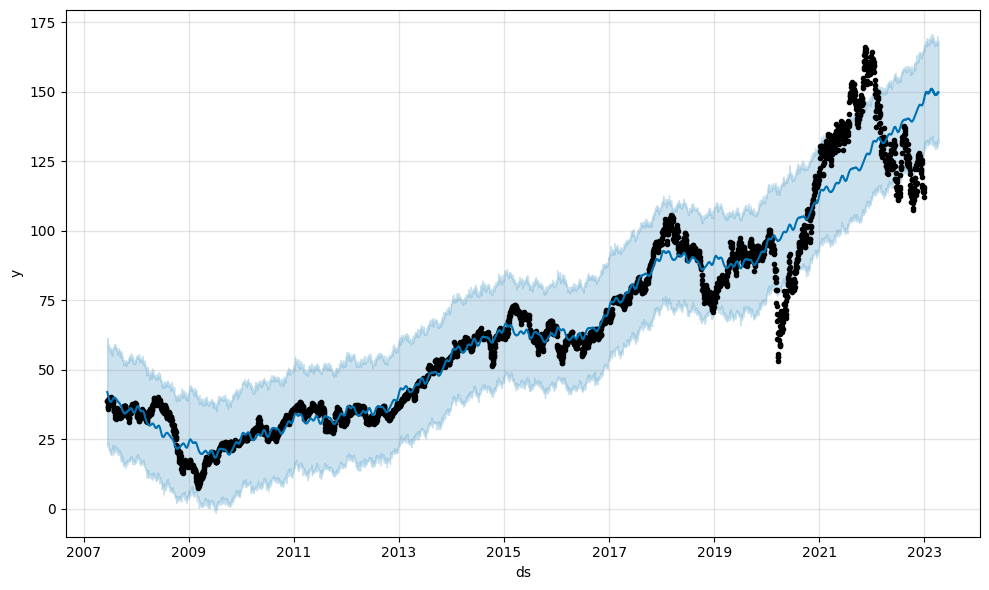

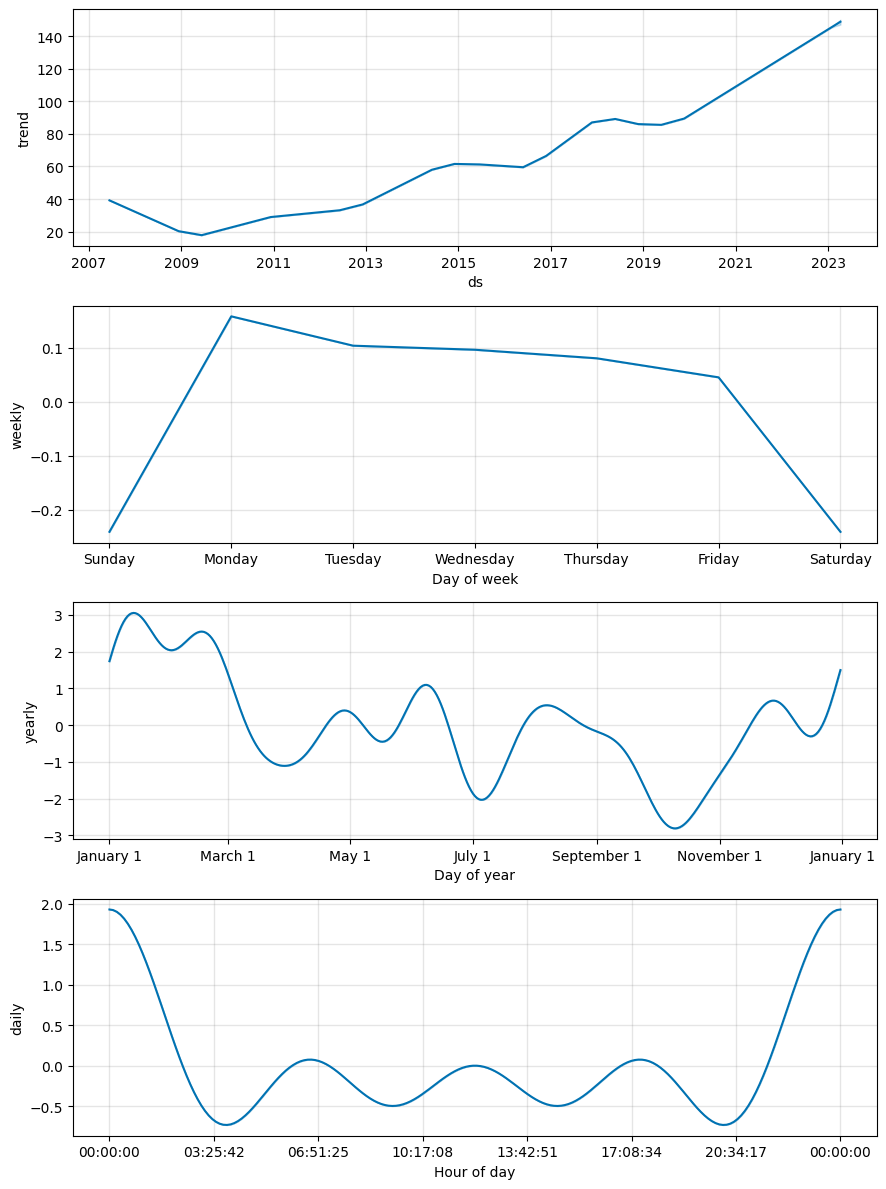

In [6]:
#closing_prices.reset_index(inplace=True)
#closing_prices.rename(columns={'Date': 'ds'}, inplace=True)
#closing_prices.rename(columns={'TEL': 'y'}, inplace=True)
#closing_prices.dropna(
from prophet import Prophet
model = Prophet()

m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(closing_prices)

# Make a dataframe with the dates for which you want a forecast
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast
plot1 = m.plot(forecast)
plt2 = m.plot_components(forecast)


In [ ]:
closing_prices

In [7]:
from prophet import Prophet
model = Prophet()

m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(closing_prices)

# Make a dataframe with the dates for which you want a forecast
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast

06:44:32 - cmdstanpy - INFO - Chain [1] start processing
06:44:34 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-06-14,39.202413,24.284846,58.903246,39.202413,39.202413,2.767893,2.767893,2.767893,1.928385,...,0.080101,0.080101,0.080101,0.759407,0.759407,0.759407,0.0,0.0,0.0,41.970306
1,2007-06-15,39.167771,23.921752,59.528877,39.167771,39.167771,2.613410,2.613410,2.613410,1.928385,...,0.044848,0.044848,0.044848,0.640176,0.640176,0.640176,0.0,0.0,0.0,41.781181
2,2007-06-18,39.063846,23.946129,61.793368,39.063846,39.063846,2.285676,2.285676,2.285676,1.928385,...,0.157756,0.157756,0.157756,0.199534,0.199534,0.199534,0.0,0.0,0.0,41.349522
3,2007-06-19,39.029204,23.283980,58.621396,39.029204,39.029204,2.063520,2.063520,2.063520,1.928385,...,0.103461,0.103461,0.103461,0.031674,0.031674,0.031674,0.0,0.0,0.0,41.092724
4,2007-06-20,38.994562,23.510462,58.331416,38.994562,38.994562,1.881421,1.881421,1.881421,1.928385,...,0.095930,0.095930,0.095930,-0.142894,-0.142894,-0.142894,0.0,0.0,0.0,40.875983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2023-04-05,148.640169,131.514659,168.100066,147.083672,149.897487,1.022041,1.022041,1.022041,1.928385,...,0.095930,0.095930,0.095930,-1.002274,-1.002274,-1.002274,0.0,0.0,0.0,149.662210
4012,2023-04-06,148.688282,130.847147,167.016829,147.113220,149.963935,1.044482,1.044482,1.044482,1.928385,...,0.080101,0.080101,0.080101,-0.964005,-0.964005,-0.964005,0.0,0.0,0.0,149.732763
4013,2023-04-07,148.736394,131.576196,169.577542,147.143097,150.030384,1.053587,1.053587,1.053587,1.928385,...,0.044848,0.044848,0.044848,-0.919646,-0.919646,-0.919646,0.0,0.0,0.0,149.789981
4014,2023-04-08,148.784507,130.108914,168.324252,147.172975,150.096714,0.818110,0.818110,0.818110,1.928385,...,-0.241048,-0.241048,-0.241048,-0.869227,-0.869227,-0.869227,0.0,0.0,0.0,149.602617


In [8]:
forecast.tail(200)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3816,2022-08-10,137.189343,121.476181,157.619915,137.189343,137.189343,2.536474,2.536474,2.536474,1.928385,...,0.095930,0.095930,0.095930,0.512159,0.512159,0.512159,0.0,0.0,0.0,139.725818
3817,2022-08-11,137.237456,122.697411,158.096596,137.237456,137.237456,2.500401,2.500401,2.500401,1.928385,...,0.080101,0.080101,0.080101,0.491914,0.491914,0.491914,0.0,0.0,0.0,139.737857
3818,2022-08-12,137.285569,122.909676,157.376161,137.285569,137.285569,2.440387,2.440387,2.440387,1.928385,...,0.044848,0.044848,0.044848,0.467154,0.467154,0.467154,0.0,0.0,0.0,139.725956
3819,2022-08-15,137.429907,122.108602,158.749908,137.429907,137.429907,2.458159,2.458159,2.458159,1.928385,...,0.157756,0.157756,0.157756,0.372018,0.372018,0.372018,0.0,0.0,0.0,139.888066
3820,2022-08-16,137.478020,122.057230,156.950056,137.478020,137.478020,2.367276,2.367276,2.367276,1.928385,...,0.103461,0.103461,0.103461,0.335430,0.335430,0.335430,0.0,0.0,0.0,139.845296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,2023-04-05,148.640169,131.514659,168.100066,147.083672,149.897487,1.022041,1.022041,1.022041,1.928385,...,0.095930,0.095930,0.095930,-1.002274,-1.002274,-1.002274,0.0,0.0,0.0,149.662210
4012,2023-04-06,148.688282,130.847147,167.016829,147.113220,149.963935,1.044482,1.044482,1.044482,1.928385,...,0.080101,0.080101,0.080101,-0.964005,-0.964005,-0.964005,0.0,0.0,0.0,149.732763
4013,2023-04-07,148.736394,131.576196,169.577542,147.143097,150.030384,1.053587,1.053587,1.053587,1.928385,...,0.044848,0.044848,0.044848,-0.919646,-0.919646,-0.919646,0.0,0.0,0.0,149.789981
4014,2023-04-08,148.784507,130.108914,168.324252,147.172975,150.096714,0.818110,0.818110,0.818110,1.928385,...,-0.241048,-0.241048,-0.241048,-0.869227,-0.869227,-0.869227,0.0,0.0,0.0,149.602617


/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

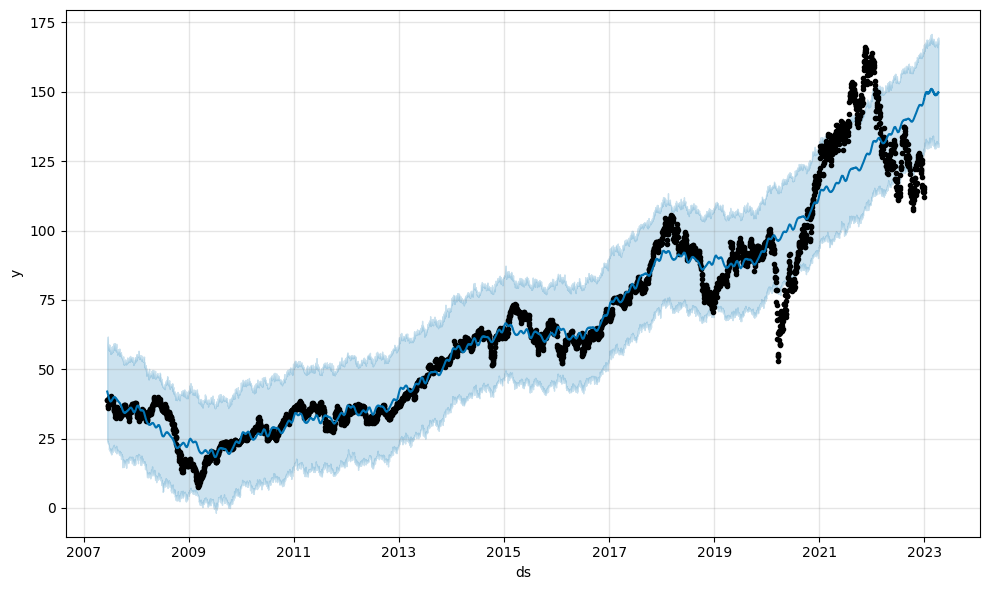

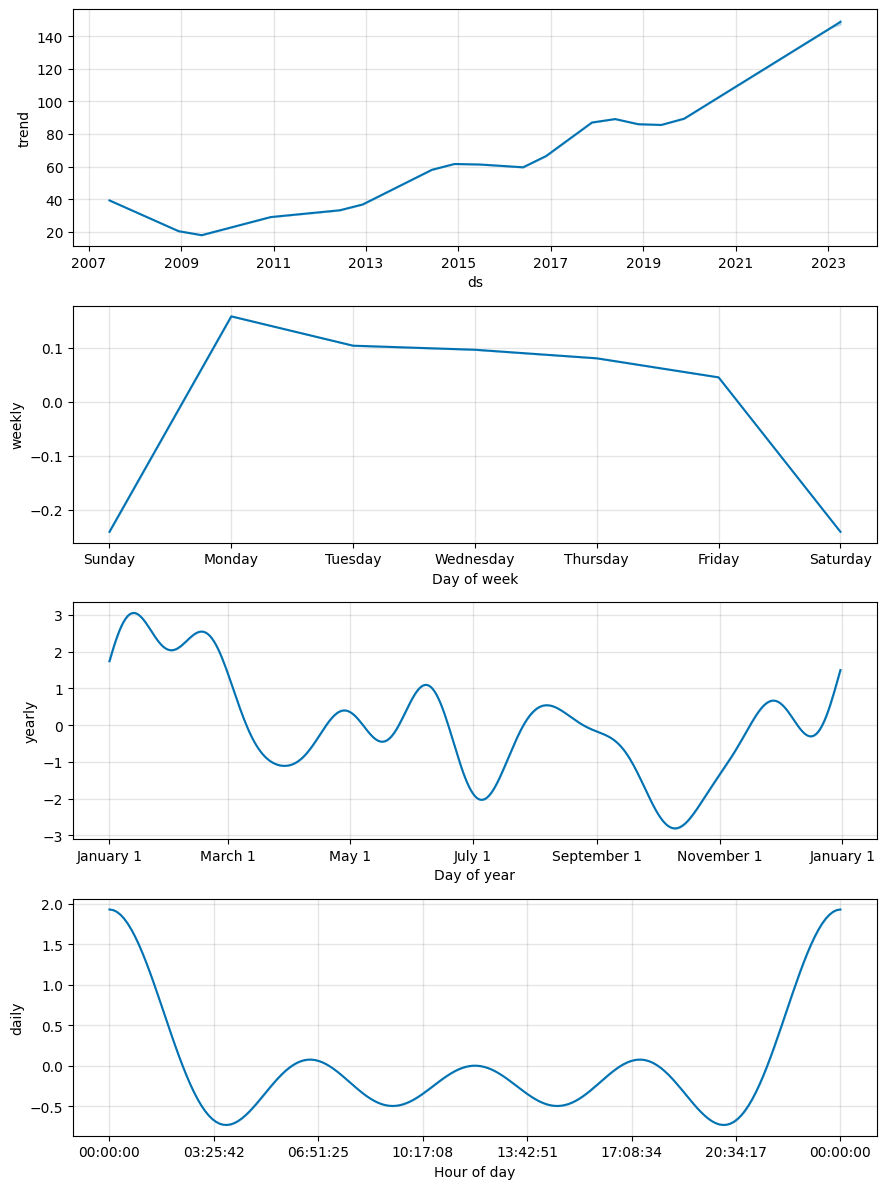

In [9]:
plot1 = m.plot(forecast)
plt2 = m.plot_components(forecast)


In [10]:
forecast.to_csv('forecast.csv')